In [0]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import matplotlib as mlp
mlp.rcParams['axes.grid'] = False

# Load Dataset Images

In [2]:
# Thank's Jonata!
filename = '2019-02-28-crystal.zip'
data_url = 'https://storage.googleapis.com/public.analitico.ai/data/crystal-design/' + filename
!wget {data_url}
!unzip -q {filename}

path = 'images/'

--2019-03-08 20:17:03--  https://storage.googleapis.com/public.analitico.ai/data/crystal-design/2019-02-28-crystal.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2389066515 (2.2G) [application/zip]
Saving to: ‘2019-02-28-crystal.zip.2’

2019-02-28-crystal. 100%[===================>]   2.22G  12.2MB/s    in 37s     

2019-03-08 20:17:41 (61.7 MB/s) - ‘2019-02-28-crystal.zip.2’ saved [2389066515/2389066515]

replace images/DIVA-477612-1Start-1-27.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


# Load Dataset Table

In [3]:
!wget https://raw.githubusercontent.com/tvmlverona/ProgettoPoltroni/master/poltroni-molto-meglio-clean.csv

--2019-03-08 20:19:36--  https://raw.githubusercontent.com/tvmlverona/ProgettoPoltroni/master/poltroni-molto-meglio-clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1777854 (1.7M) [text/plain]
Saving to: ‘poltroni-molto-meglio-clean.csv.2’

poltroni-molto-megl 100%[===================>]   1.70M  --.-KB/s    in 0.09s   

2019-03-08 20:19:36 (19.1 MB/s) - ‘poltroni-molto-meglio-clean.csv.2’ saved [1777854/1777854]



In [4]:
dataset = pd.read_csv('poltroni-molto-meglio-clean.csv')
dataset.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16121 entries, 0 to 16120
Data columns (total 8 columns):
DivaNr          16121 non-null object
Color           16121 non-null object
Red             16121 non-null float64
Green           16121 non-null float64
Blue            16121 non-null float64
PoltroniCode    16121 non-null object
ImgName         16121 non-null object
RotAngle        16121 non-null int64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.1 MB


# Train-Test Split

In [5]:
VALID_SIZE = 0.2
TEST_SIZE = 0.2

# Poltroni model will be splitted into three partitions,
# indipendently of the rotation angle

poltroni_list = dataset['PoltroniCode'].unique().tolist()
tmp, poltroni_test = train_test_split(poltroni_list, test_size=TEST_SIZE)
poltroni_train, poltroni_valid = train_test_split(tmp, test_size=VALID_SIZE)

print('Unique Poltroni model per set')
print('{:20s} : {:8d}'.format('Training Set', len(poltroni_train)))
print('{:20s} : {:8d}'.format('Validation Set', len(poltroni_valid)))
print('{:20s} : {:8d}'.format('Test Set', len(poltroni_test)))

poltroni_train = dataset.loc[dataset['PoltroniCode'].isin(poltroni_train)]
poltroni_valid = dataset.loc[dataset['PoltroniCode'].isin(poltroni_valid)]
poltroni_test = dataset.loc[dataset['PoltroniCode'].isin(poltroni_test)]

Unique Poltroni model per set
Training Set         :      286
Validation Set       :       72
Test Set             :       90


## Display Random Image

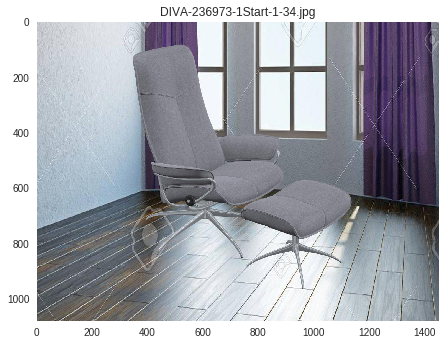

In [6]:
img_rand = dataset['ImgName'].sample().item()
img = plt.imread(path + img_rand)
plt.imshow(img)
plt.title(img_rand)
plt.show()

## Image Generator

# Training Phase

# Validation Phase

# Display Results